# Data Analysis Project using Python 

## a. Data Loading

- Loading the dataset using pandas

In [4]:
import pandas as pd
df=pd.read_csv("student-mat.csv", delimiter=";")

the dataset from the required csv file has been loaded into 'df' for futher analysis.

- Displaying the first few rows using head() 


In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


a glimpse of the aquired dataset is shown

## b. Data Exploration

-  Checking for missing values using isnull().sum().

In [11]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

 The dataset doesnot contain any missing values

-  Displaying column data types using dtypes.

In [14]:
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


All the columns are observed to be of either object or integer datatype

- Understand the dataset's size using .shape.


In [17]:
print(df.shape)

(395, 33)


The output (395, 33) confirms that your DataFrame now has 395 rows and 33 columns

## c. Data Cleaning

 Handle missing values (e.g., replace them with the median or remove rows).
 since the dataset doenot have any missing values we can try droping rows

In [21]:
df.dropna(inplace=True)

- Remove duplicate entries using drop_duplicates().

In [23]:
df.drop_duplicates(inplace=True)

- any duplicates present in the data set are dropped

## d. Data Analysis Questions

1. What is the average score in math (G3)?

In [27]:
avg_math_score=df["G3"].mean()
print("the average score in math(c3) is ",avg_math_score)

the average score in math(c3) is  10.415189873417722


2. How many students scored above 15 in their final grade (G3)?

In [29]:
score_above_15=(df["G3"]>15).sum()
print("students scored above 15 in their final grade (G3) are ",score_above_15)

students scored above 15 in their final grade (G3) are  40


3. Is there a correlation between study time (study time) and the final grade (G3)?

To check if there is a correlation between the study time (studytime) and the final grade (G3), one can calculate the Pearson correlation coefficient using pandas.The Pearson correlation coefficient ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation). A value near 0 suggests no linear correlation. 

In [32]:
correlation=df["studytime"].corr(df["G3"])
print("The correlation between study time (study time) and the final grade (G3) is ",correlation)

The correlation between study time (study time) and the final grade (G3) is  0.0978196896531963


Here the correlation coefficient is 0.098 which is close to 0, which suggests that the study time doesn't have a significant linear relationship with the final grade (G3). 

4. Which gender has a higher average final grade (G3)?

To determine which gender has a higher average final grade (G3), one can group the data by the sex column and calculate the mean of G3 for each gender.

In [36]:
grouped_gender_mean=df.groupby("sex")["G3"].mean()
print(grouped_gender_mean)

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


From the output we can say that male gender has higher final grade(G3)

## e. Data Visualization

- Plot a histogram of final grades (G3).

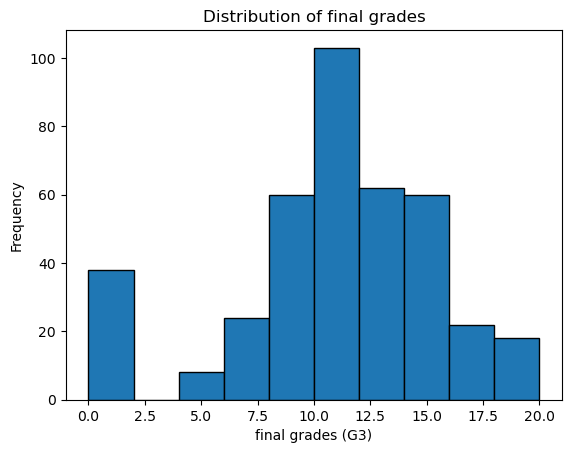

In [60]:
import matplotlib.pyplot as plt
plt.hist(df["G3"],edgecolor="black",bins=10)
plt.xlabel("final grades (G3)")
plt.ylabel("Frequency")
plt.title("Distribution of final grades")
plt.show()

This histogram shows the distribution of the final grades. <br>
Key Findings:<br>-most students are scoring in the range of 8 to 16<br>
             -there is a peak at grade range 10 to 12

- Create a scatter plot between study time (study time) and final grade (G3).

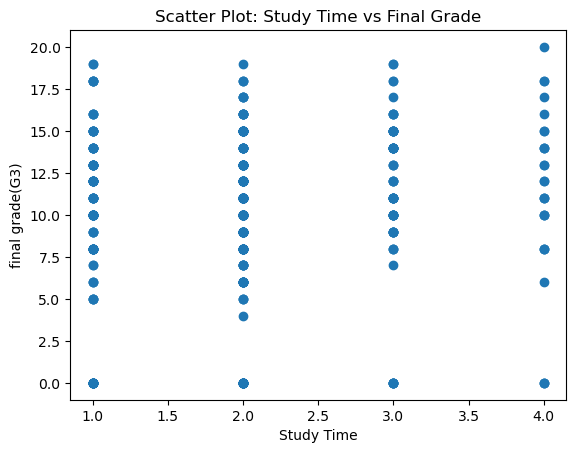

In [66]:
plt.scatter(df["studytime"],df["G3"])
plt.xlabel("Study Time")
plt.ylabel("final grade(G3)")
plt.title("Scatter Plot: Study Time vs Final Grade")
plt.show()

This scatter plot will help visualize the relationship between studytime and G3.<br>A slight positive correlation was observed between study time and final grades, indicating that students who dedicate more time to studying tend to achieve higher grades.

- Create a bar chart comparing the average scores of male and female students.

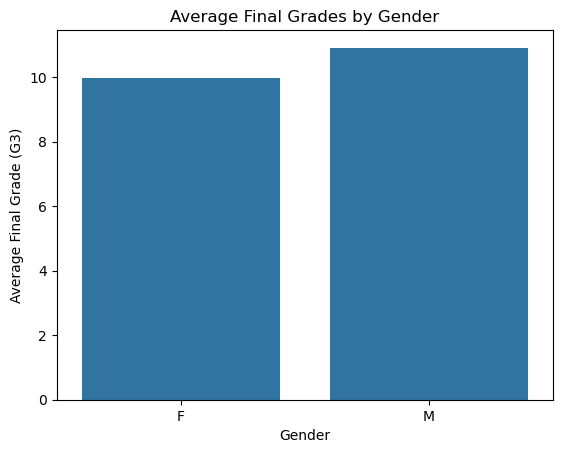

In [78]:
import seaborn as sns
grouped_gender=df.groupby("sex")["G3"].mean().reset_index()
sns.barplot(x="sex",y="G3",data=grouped_gender)
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.title("Average Final Grades by Gender")
plt.show()

This bar chart will display the average G3 scores for each gender.<br>Male students have a slightly higher average final grade than Female students, suggesting potential differences in academic performance by gender.